## Project 2: The Dijkstra's Algorithm
1. Priority queue with array
2. Priority queue with Minimizing Heap

In [316]:
#import libraries/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.ticker as ticker

In [317]:
#Debugging purposes - limit intervals, x-axis, y-axis 
def GraphLimiter(Multiplier, x_upperBound, y_upperBound):
    ax.xaxis.set_major_locator(ticker.MultipleLocator(Multiplier))
    ax.set_xlim([0,x_upperBound])
    ax.set_ylim([0,y_upperBound])

In [318]:
#kcoskun https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkx
def my_draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=None,
    label_pos=0.5,
    font_size=10,
    font_color="k",
    font_family="sans-serif",
    font_weight="normal",
    alpha=None,
    bbox=None,
    horizontalalignment="center",
    verticalalignment="center",
    ax=None,
    rotate=True,
    clip_on=True,
    rad=0
):
    """Draw edge labels.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary
        A dictionary with nodes as keys and positions as values.
        Positions should be sequences of length 2.

    edge_labels : dictionary (default={})
        Edge labels in a dictionary of labels keyed by edge two-tuple.
        Only labels for the keys in the dictionary are drawn.

    label_pos : float (default=0.5)
        Position of edge label along edge (0=head, 0.5=center, 1=tail)

    font_size : int (default=10)
        Font size for text labels

    font_color : string (default='k' black)
        Font color string

    font_weight : string (default='normal')
        Font weight

    font_family : string (default='sans-serif')
        Font family

    alpha : float or None (default=None)
        The text transparency

    bbox : Matplotlib bbox, optional
        Specify text box properties (e.g. shape, color etc.) for edge labels.
        Default is {boxstyle='round', ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)}.

    horizontalalignment : string (default='center')
        Horizontal alignment {'center', 'right', 'left'}

    verticalalignment : string (default='center')
        Vertical alignment {'center', 'top', 'bottom', 'baseline', 'center_baseline'}

    ax : Matplotlib Axes object, optional
        Draw the graph in the specified Matplotlib axes.

    rotate : bool (deafult=True)
        Rotate edge labels to lie parallel to edges

    clip_on : bool (default=True)
        Turn on clipping of edge labels at axis boundaries

    Returns
    -------
    dict
        `dict` of labels keyed by edge

    Examples
    --------
    >>> G = nx.dodecahedral_graph()
    >>> edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

    Also see the NetworkX drawing examples at
    https://networkx.org/documentation/latest/auto_examples/index.html

    See Also
    --------
    draw
    draw_networkx
    draw_networkx_nodes
    draw_networkx_edges
    draw_networkx_labels
    """
    import matplotlib.pyplot as plt
    import numpy as np

    if ax is None:
        ax = plt.gca()
    if edge_labels is None:
        labels = {(u, v): d for u, v, d in G.edges(data=True)}
    else:
        labels = edge_labels
    text_items = {}
    for (n1, n2), label in labels.items():
        (x1, y1) = pos[n1]
        (x2, y2) = pos[n2]
        (x, y) = (
            x1 * label_pos + x2 * (1.0 - label_pos),
            y1 * label_pos + y2 * (1.0 - label_pos),
        )
        pos_1 = ax.transData.transform(np.array(pos[n1]))
        pos_2 = ax.transData.transform(np.array(pos[n2]))
        linear_mid = 0.5*pos_1 + 0.5*pos_2
        d_pos = pos_2 - pos_1
        rotation_matrix = np.array([(0,1), (-1,0)])
        ctrl_1 = linear_mid + rad*rotation_matrix@d_pos
        ctrl_mid_1 = 0.5*pos_1 + 0.5*ctrl_1
        ctrl_mid_2 = 0.5*pos_2 + 0.5*ctrl_1
        bezier_mid = 0.5*ctrl_mid_1 + 0.5*ctrl_mid_2
        (x, y) = ax.transData.inverted().transform(bezier_mid)

        if rotate:
            # in degrees
            angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
            # make label orientation "right-side-up"
            if angle > 90:
                angle -= 180
            if angle < -90:
                angle += 180
            # transform data coordinate angle to screen coordinate angle
            xy = np.array((x, y))
            trans_angle = ax.transData.transform_angles(
                np.array((angle,)), xy.reshape((1, 2))
            )[0]
        else:
            trans_angle = 0.0
        # use default box of white with white border
        if bbox is None:
            bbox = dict(boxstyle="round", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0))
        if not isinstance(label, str):
            label = str(label)  # this makes "1" and 1 labeled the same

        t = ax.text(
            x,
            y,
            label,
            size=font_size,
            color=font_color,
            family=font_family,
            weight=font_weight,
            alpha=alpha,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            rotation=trans_angle,
            transform=ax.transData,
            bbox=bbox,
            zorder=1,
            clip_on=clip_on,
        )
        text_items[(n1, n2)] = t

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

    return text_items

In [319]:
# #Nodes graph visualization Test
# df = pd.read_csv("../data/VaryingDFixedV/V_100_D_100_Heap/graph62.csv")
# #df = pd.read_csv("../data/FixedDFixedV/V_100_D_100_/graph.csv")
# #empty graph
# G = nx.DiGraph()

# #iterate through the Dataframe and add nodes/edges/weights
# for index,row in df.iterrows():
#     source = row["source"]
#     target = row["target"]
#     weights = row["weight"]
#     G.add_edge(source, target, weight = weights)

# # Node Layout (SPRING/CIRCULAR/PLANAR/RANDOM)
# #node_positions = nx.spring_layout(G) 
# node_positions = nx.circular_layout(G)
# #node_positions = nx.planar_layout(G) 
# #node_positions = nx.random_layout(G)
# #node_positions = nx.kamada_kawai_layout(G)
# #node_positions = nx.spectral_layout(G)
# #node_positions = nx.shell_layout(G)
# #node_positions = nx.spiral_layout(G)

# # Draw nodes
# #nx.draw(G, node_positions, with_labels=True, arrows=True, node_size=800, node_color="skyblue")
# nx.draw_networkx_nodes(G, node_positions, node_size = 200)
# nx.draw_networkx_labels(G, node_positions, font_size = 10)


# #The draw_networkx_edges function of NetworkX is able to draw only a subset of the edges with the edgelist parameter.
# curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
# straight_edges = list(set(G.edges()) - set(curved_edges))

# nx.draw_networkx_edges(G, node_positions, edgelist= straight_edges)
# arc_rad = 0
# nx.draw_networkx_edges(G, node_positions, edgelist= curved_edges,connectionstyle=f'arc3, rad = {arc_rad}')

# #Labelling
# edge_weights = nx.get_edge_attributes(G,'weight')
# curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
# straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
# my_draw_networkx_edge_labels(G, node_positions, edge_labels=curved_edge_labels,rotate=False,rad = arc_rad, font_size= 7.5)
# nx.draw_networkx_edge_labels(G, node_positions, edge_labels=straight_edge_labels,rotate=False, font_size =7.5)

# # Show the plot
# plt.axis("off")
# plt.show()

## Comparison (Array vs Minheap for Priority Queue)
---

### Varying Density & Fixed Number of Vertices (N)

In [320]:
#Comparison graph Visualization

#Heap Dataframes
V100_D100_HEAP_DF = pd.read_csv("../data/VaryingDFixedV/V_100_D_100_Heap/V_100_D_100_Heap.csv")
V200_D200_HEAP_DF = pd.read_csv("../data/VaryingDFixedV/V_200_D_200_Heap/V_200_D_200_Heap.csv")
V300_D300_HEAP_DF = pd.read_csv("../data/VaryingDFixedV/V_300_D_300_Heap/V_300_D_300_Heap.csv")
#Array Dataframes
V100_D100_ARRAY_DF = pd.read_csv("../data/VaryingDFixedV/V_100_D_100_Array/V_100_D_100_Array.csv")
V200_D200_ARRAY_DF = pd.read_csv("../data/VaryingDFixedV/V_200_D_200_Array/V_200_D_200_Array.csv")
V300_D300_ARRAY_DF = pd.read_csv("../data/VaryingDFixedV/V_300_D_300_Array/V_300_D_300_Array.csv")


#### minHeap Implementation (Varying Density & Fixed N)

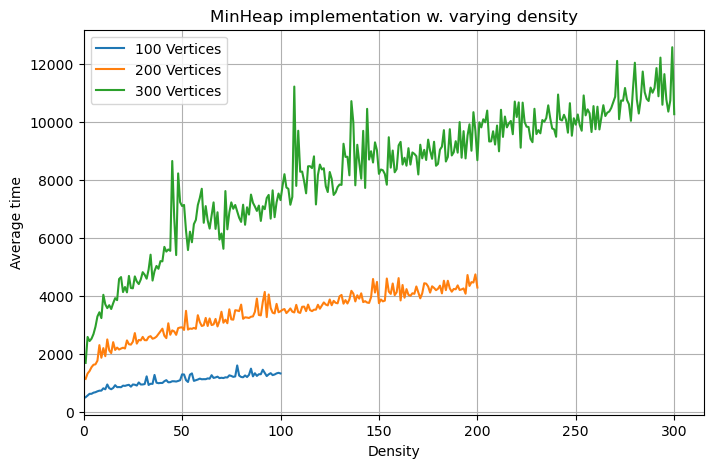

In [321]:
fig= plt.figure(figsize= (8,5))

HeapList = [V100_D100_HEAP_DF,V200_D200_HEAP_DF,V300_D300_HEAP_DF]
label = [100,200,300]

for i in range(3):
    HeapArray = HeapList[i]
    plt.plot(HeapArray ["Density"], HeapArray["Time taken(ms)"], label = f"{label[i]} Vertices")


plt.title("MinHeap implementation w. varying density")
plt.xlabel("Density")
plt.ylabel("Average time")

plt.legend()
plt.grid()
plt.xlim(left = 0)
plt.show()


#### Array Implementation (Varying Density & Fixed N)

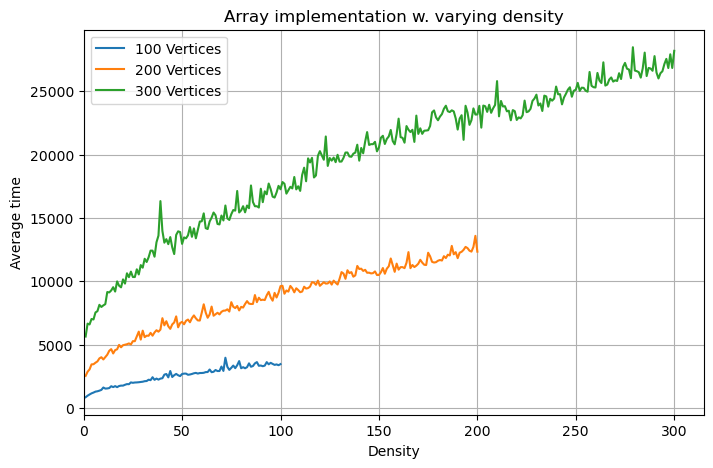

In [322]:
fig = plt.figure(figsize= (8,5))
ArrayList = [V100_D100_ARRAY_DF,V200_D200_ARRAY_DF,V300_D300_ARRAY_DF]
label = [100,200,300]

for i in range(3):
    ArrayDF = ArrayList[i]
    plt.plot(ArrayDF["Density"], ArrayDF["Time taken(ms)"], label = f"{label[i]} Vertices")

plt.title("Array implementation w. varying density")
plt.xlabel("Density")
plt.ylabel("Average time")

plt.legend()
plt.grid()
plt.xlim(left = 0)
plt.show()

#### Array vs MinHeap Implementation (Varying Density & Fixed N)

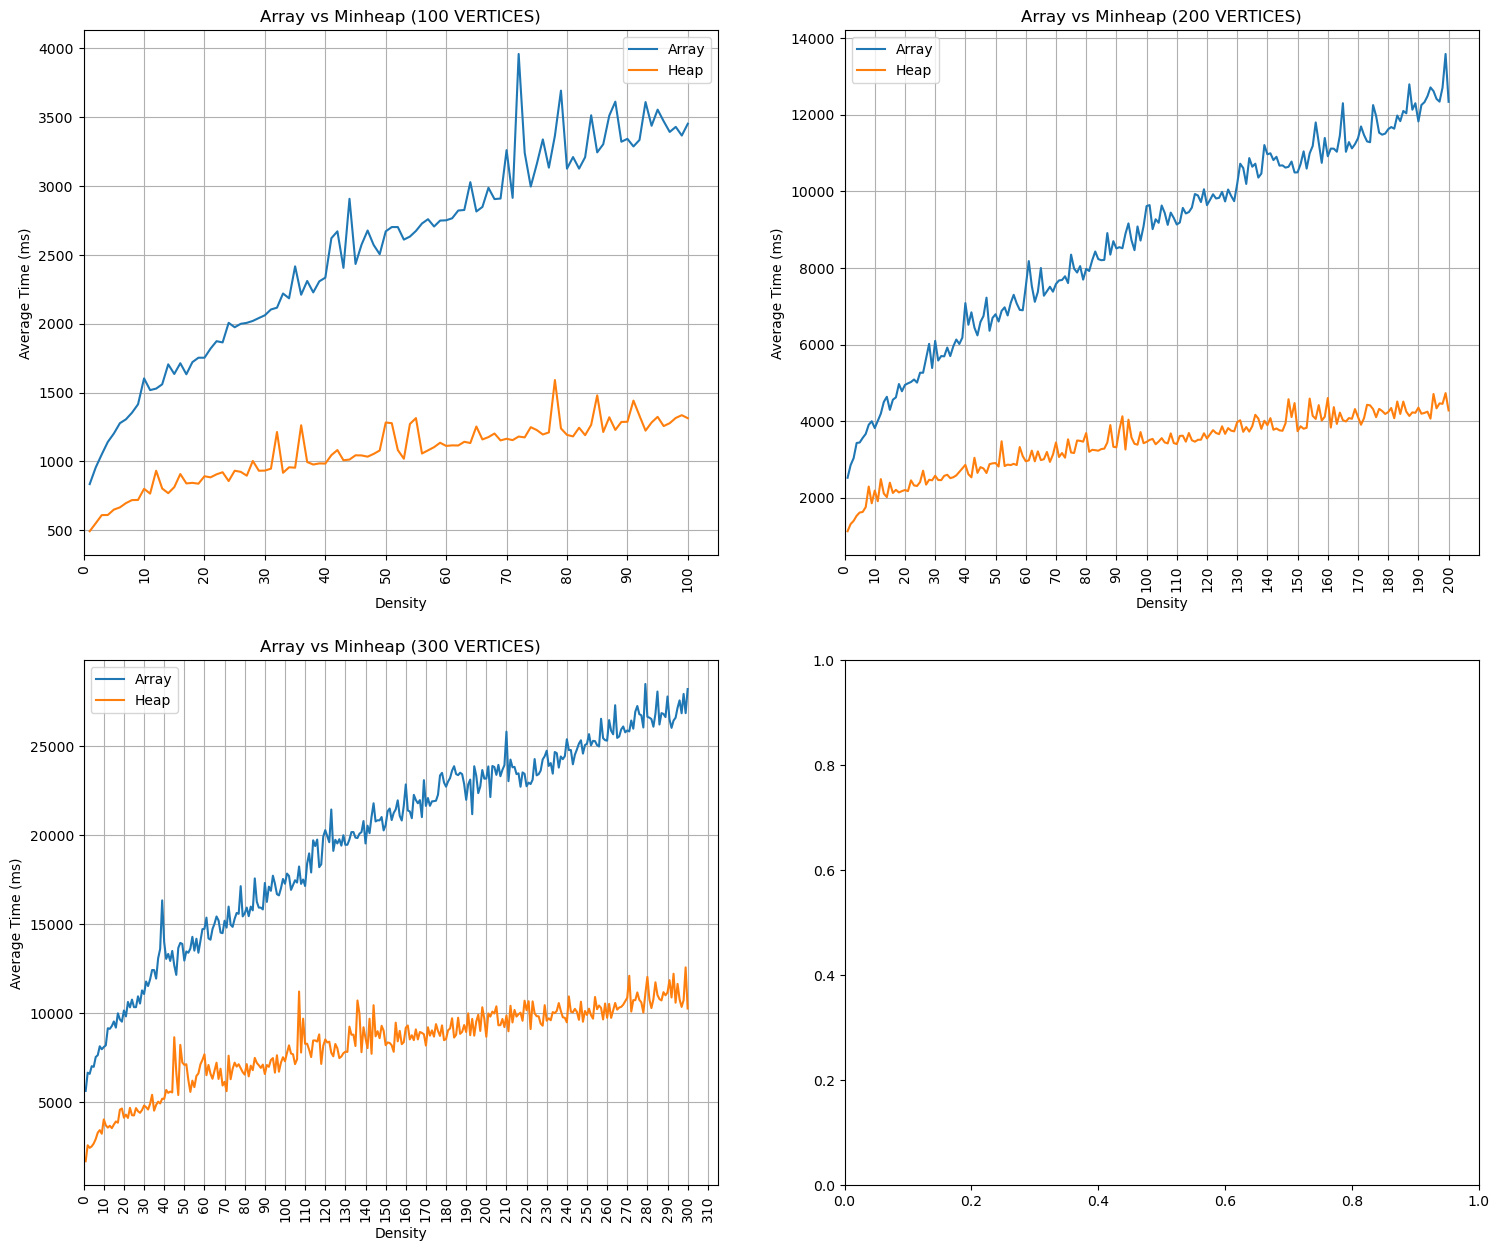

In [323]:
fig, ax = plt.subplots(2,2, figsize =(18,15))   

HeapList = [V100_D100_HEAP_DF,V200_D200_HEAP_DF,V300_D300_HEAP_DF]
ArrayList = [V100_D100_ARRAY_DF,V200_D200_ARRAY_DF,V300_D300_ARRAY_DF]
title = [100,200,300,0]
k = 0
#GRAPH PLOT
for i in range (2):
    for j in range (2):
        if i * 2 + j < len(HeapList):
            HeapDF = HeapList[i * 2 + j]
            ArrayDF = ArrayList[i * 2 + j]
            ax[i,j].plot(ArrayDF["Density"], ArrayDF["Time taken(ms)"], label = "Array")
            ax[i,j].plot(HeapDF["Density"], HeapDF["Time taken(ms)"], label = "Heap")

            ax[i,j].set_xlabel("Density")
            ax[i,j].set_ylabel("Average Time (ms)")

            ax[i,j].set_title(f"Array vs Minheap ({title[k]} VERTICES)")
            ax[i,j].ticklabel_format(style='plain', axis='both')
            ax[i,j].tick_params(axis = "x", rotation = 90)
            ax[i,j].xaxis.set_major_locator(ticker.MultipleLocator(10))
            ax[i,j].legend()
            ax[i,j].grid()
            ax[i,j].set_xlim(left = 0)
            k+=1

---



### Fixed Density & Varying Number of Vertices (N)

In [324]:
V500_D50_HEAP_DF = pd.read_csv("../data/VaryingVFixedD/V_500_D_50_Heap/V_500_D_50_Heap.csv")
V500_D100_HEAP_DF = pd.read_csv("../data/VaryingVFixedD/V_500_D_100_Heap/V_500_D_100_Heap.csv")
V500_D200_HEAP_DF = pd.read_csv("../data/VaryingVFixedD/V_500_D_200_Heap/V_500_D_200_Heap.csv")
V500_D300_HEAP_DF = pd.read_csv("../data/VaryingVFixedD/V_500_D_300_Heap/V_500_D_300_Heap.csv")

V500_D50_ARRAY_DF = pd.read_csv("../data/VaryingVFixedD/V_500_D_50_Array/V_500_D_50_Array.csv")
V500_D100_ARRAY_DF  = pd.read_csv("../data/VaryingVFixedD/V_500_D_100_Array/V_500_D_100_Array.csv")
V500_D200_ARRAY_DF  = pd.read_csv("../data/VaryingVFixedD/V_500_D_200_Array/V_500_D_200_Array.csv")
V500_D300_ARRAY_DF  = pd.read_csv("../data/VaryingVFixedD/V_500_D_300_Array/V_500_D_300_Array.csv")


#### Heap Implementation (Fixed Density & Varying N)

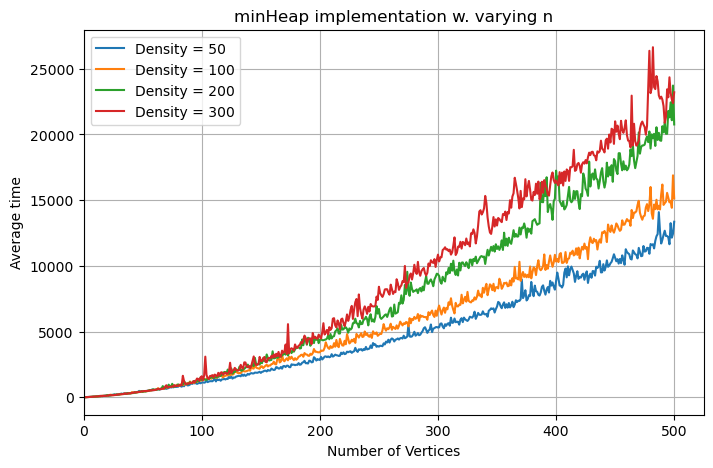

In [325]:
fig= plt.figure(figsize= (8,5))
ax = fig.add_subplot(1,1,1)

HeapList = [V500_D50_HEAP_DF,V500_D100_HEAP_DF,V500_D200_HEAP_DF,V500_D300_HEAP_DF]
label = [50,100,200,300]

for i in range(4):
    HeapDF = HeapList[i]
    plt.plot(HeapDF["Vertices"], HeapDF["Time taken(ms)"], label = f"Density = {label[i]}")

plt.title("minHeap implementation w. varying n")
plt.xlabel("Number of Vertices")
plt.ylabel("Average time")

#GraphLimiter(50,250,5000)

plt.grid()
plt.legend()
plt.xlim(left = 0)
plt.show()

#### Array Implementation (Fixed Density & Varying N)

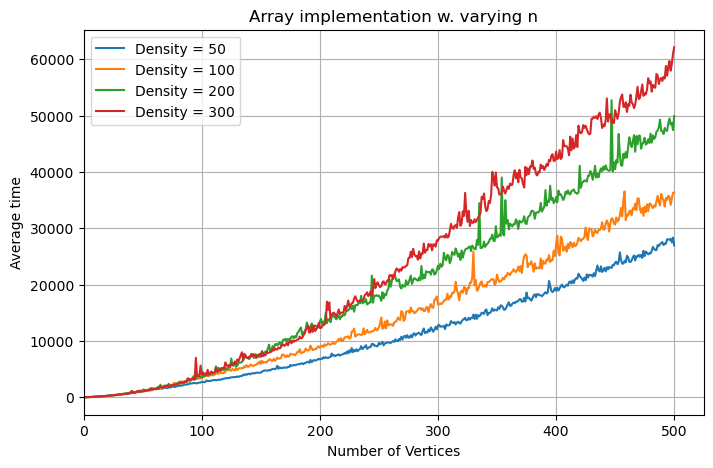

In [326]:
fig, ax = plt.subplots(figsize= (8,5))
ArrayList = [V500_D50_ARRAY_DF,V500_D100_ARRAY_DF,V500_D200_ARRAY_DF,V500_D300_ARRAY_DF]
label = [50,100,200,300]

for i in range(4):
    ArrayDF = ArrayList[i]
    plt.plot(ArrayDF["Vertices"], ArrayDF["Time taken(ms)"], label = f"Density = {label[i]}")

plt.title("Array implementation w. varying n")
plt.xlabel("Number of Vertices")
plt.ylabel("Average time")

plt.legend()
ax.grid(True, which='both')
plt.xlim(left = 0)
plt.show()

#### Array vs MinHeap Implementation (Fixed Density & Varying N)

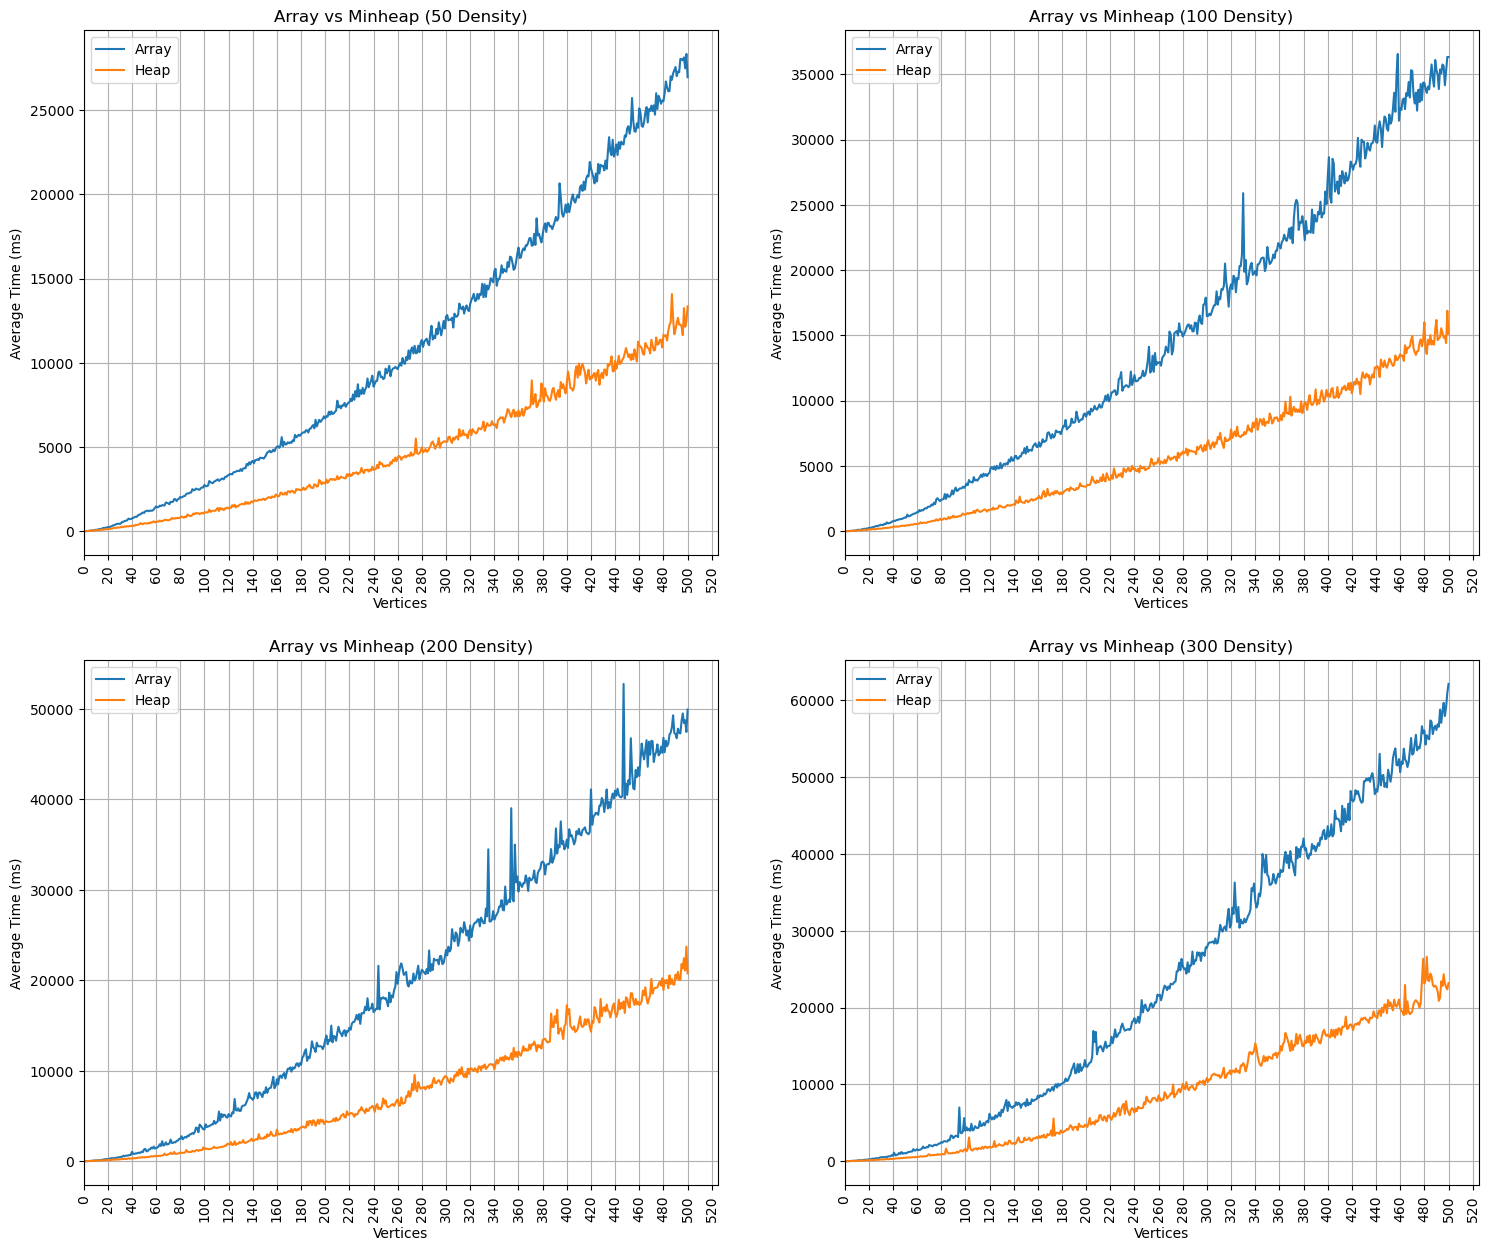

In [327]:
fig, ax = plt.subplots(2,2, figsize =(18,15))   

HeapList = [V500_D50_HEAP_DF,V500_D100_HEAP_DF,V500_D200_HEAP_DF,V500_D300_HEAP_DF]
ArrayList = [V500_D50_ARRAY_DF,V500_D100_ARRAY_DF,V500_D200_ARRAY_DF,V500_D300_ARRAY_DF]
title = [50,100,200,300]
k = 0
#GRAPH PLOT
for i in range (2):
    for j in range (2):
        if i * 2 + j < len(HeapList):
            HeapDF = HeapList[i * 2 + j]
            ArrayDF = ArrayList[i * 2 + j]
            ax[i,j].plot(ArrayDF["Vertices"], ArrayDF["Time taken(ms)"], label = "Array")
            ax[i,j].plot(HeapDF["Vertices"], HeapDF["Time taken(ms)"], label = "Heap")

            ax[i,j].set_xlabel("Vertices")
            ax[i,j].set_ylabel("Average Time (ms)")

            ax[i,j].set_title(f"Array vs Minheap ({title[k]} Density)")
            ax[i,j].ticklabel_format(style='plain', axis='both')
            ax[i,j].tick_params(axis = "x", rotation = 90)
            ax[i,j].xaxis.set_major_locator(ticker.MultipleLocator(20))
            ax[i,j].legend()
            ax[i,j].grid()
            ax[i,j].set_xlim(left = 0)
            k+=1

## Sparse Graph (Density = 1) MinHeap & Array Comparison
---

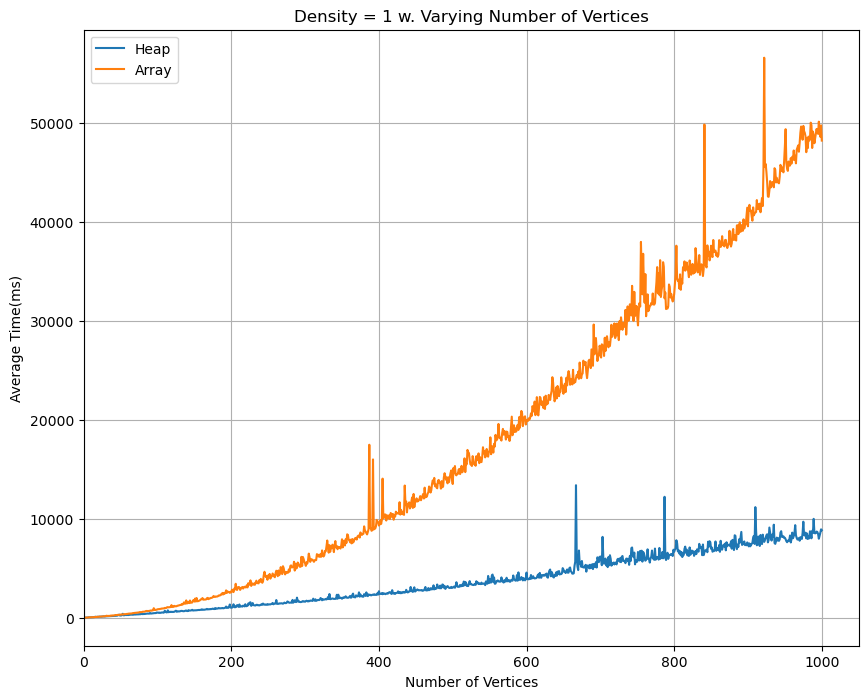

In [328]:
V1000_D1_HEAP_DF = pd.read_csv("../data/VaryingVFixedD/V_1000_D_1_Heap/V_1000_D_1_Heap.csv")
V1000_D1_ARRAY_DF = pd.read_csv("../data/VaryingVFixedD/V_1000_D_1_Array/V_1000_D_1_Array.csv")


fig = plt.figure(figsize = (10,8))
plt.plot(V1000_D1_HEAP_DF["Vertices"], V1000_D1_HEAP_DF["Time taken(ms)"], label = "Heap")
plt.plot(V1000_D1_ARRAY_DF["Vertices"], V1000_D1_ARRAY_DF["Time taken(ms)"], label = "Array")
plt.xlim(left = 0)
plt.title("Density = 1 w. Varying Number of Vertices")
plt.xlabel("Number of Vertices")
plt.ylabel("Average Time(ms)")
plt.grid()
plt.legend()